In [31]:
# Model Chosen: Linear Regression
# Library Chosen: Statsmodels OLS 

# OLS is suitable because Cook's Distance is derived from the influence of each observation on an OLS regression fit. Futhermore, the 
# statsmodel libary provide a direct and reliable implementation of cook's distance through built in influence diagnostic. And with this it 
# makes it so that it is well suited for identifying influencial outliers. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42
pd.set_option('display.float_format', '{:.4f}'.format)

In [33]:
# Q1 Work
# Loading the data set with outlier.
df = pd.read_csv("usina_with_outliers.csv")

# Seperating the features which is X and target which is Y.
X = df[['AT', 'V', 'AP', 'RH']] # Input features
y = df['PE'] # Output Variables
X_const = sm.add_constant(X) # Adding the Y intercept.
ols_model = sm.OLS(y, X_const).fit()
# Computing the Cook's distance for each of the observation.
influence = ols_model.get_influence()
cooks_d = influence.cooks_distance[0]
# Removing the outliers using threshold.
threshold = 4 / len(df)
df_clean = df[cooks_d < threshold]
# Save cleaned dataset.
df_clean.to_csv("usina.csv", index=False)

print("Original rows:", len(df))
print("Rows after removing outliers:", len(df_clean))
print("Cook's D threshold:", threshold)

Original rows: 9568
Rows after removing outliers: 9448
Cook's D threshold: 0.0004180602006688963


In [34]:
# # Discussion For Q2
# 1) Outlier would effect both train and test errors. Whats happening is that the model is trying to distort its coefficient and it is trying
# to fit in the extreme values. hurting the prediction of the data. 
# 2) For me I think that the dataset that doesnt have the outlier shows better generalization. I think that this is because it has a lower 
# test MSE, MAE as well as a higher R^2 value across all the models.
# 3) Ridge and Lasso doesn't significantly help compared to standard linear regression. At low lambda values (0.01, 0.1), they
# perform almost exactly the same to linear regression. At high lambda values (10, 100) they actually perform worse due to underfitting.
# For this dataset, removing outliers is more effective than adding regularization.

In [35]:
# Q3 Work
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return {
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }

# Loading the dataset
df_outliers = pd.read_csv("usina_with_outliers.csv")
df_clean = pd.read_csv("usina.csv")

features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

# Split data with outliers
X_out, y_out = df_outliers[features], df_outliers[target]
Xo_train, Xo_test, yo_train, yo_test = train_test_split(
    X_out, y_out, test_size=0.3, random_state=RANDOM_STATE
)

# Split data without outliers
X_clean, y_clean = df_clean[features], df_clean[target]
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=RANDOM_STATE
)

lambdas = [0.01, 0.1, 1, 10, 100]

# 1) Linear Regression
print("=== Linear Regression (With Outliers) ===")
lr = LinearRegression()
lr_out = evaluate_model(lr, Xo_train, Xo_test, yo_train, yo_test)
for k, v in lr_out.items():
    print(f"{k}: {v:.4f}")

print("\n=== Linear Regression (Without Outliers) ===")
lr = LinearRegression()
lr_clean = evaluate_model(lr, Xc_train, Xc_test, yc_train, yc_test)
for k, v in lr_clean.items():
    print(f"{k}: {v:.4f}")

# 2) Ridge Regression
print("\n=== Ridge Regression (alpha = λ) ===")
for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge_out = evaluate_model(ridge, Xo_train, Xo_test, yo_train, yo_test)
    
    ridge = Ridge(alpha=lam)
    ridge_clean = evaluate_model(ridge, Xc_train, Xc_test, yc_train, yc_test)
    
    print(f"\nλ = {lam}")
    print(f"With outliers    | Test MAE: {ridge_out['Test MAE']:.4f} | Test MSE: {ridge_out['Test MSE']:.4f} | Test R2: {ridge_out['Test R2']:.4f}")
    print(f"Without outliers | Test MAE: {ridge_clean['Test MAE']:.4f} | Test MSE: {ridge_clean['Test MSE']:.4f} | Test R2: {ridge_clean['Test R2']:.4f}")

# 3) Lasso Regression
print("\n=== Lasso Regression (alpha = λ) ===")
for lam in lambdas:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso_out = evaluate_model(lasso, Xo_train, Xo_test, yo_train, yo_test)
    
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso_clean = evaluate_model(lasso, Xc_train, Xc_test, yc_train, yc_test)
    
    print(f"\nλ = {lam}")
    print(f"With outliers    | Test MAE: {lasso_out['Test MAE']:.4f} | Test MSE: {lasso_out['Test MSE']:.4f} | Test R2: {lasso_out['Test R2']:.4f}")
    print(f"Without outliers | Test MAE: {lasso_clean['Test MAE']:.4f} | Test MSE: {lasso_clean['Test MSE']:.4f} | Test R2: {lasso_clean['Test R2']:.4f}")

=== Linear Regression (With Outliers) ===
Train MAE: 5.1987
Test MAE: 5.0525
Train MSE: 123.3842
Test MSE: 125.1134
Train R2: 0.6502
Test R2: 0.6426

=== Linear Regression (Without Outliers) ===
Train MAE: 3.5964
Test MAE: 3.6248
Train MSE: 19.8647
Test MSE: 20.3968
Train R2: 0.9314
Test R2: 0.9303

=== Ridge Regression (alpha = λ) ===

λ = 0.01
With outliers    | Test MAE: 5.0525 | Test MSE: 125.1134 | Test R2: 0.6426
Without outliers | Test MAE: 3.6248 | Test MSE: 20.3968 | Test R2: 0.9303

λ = 0.1
With outliers    | Test MAE: 5.0525 | Test MSE: 125.1134 | Test R2: 0.6426
Without outliers | Test MAE: 3.6248 | Test MSE: 20.3968 | Test R2: 0.9303

λ = 1
With outliers    | Test MAE: 5.0525 | Test MSE: 125.1134 | Test R2: 0.6426
Without outliers | Test MAE: 3.6248 | Test MSE: 20.3968 | Test R2: 0.9303

λ = 10
With outliers    | Test MAE: 5.0525 | Test MSE: 125.1137 | Test R2: 0.6426
Without outliers | Test MAE: 3.6248 | Test MSE: 20.3965 | Test R2: 0.9303

λ = 100
With outliers    | Test

In [36]:
# Q3 Work
# Q3.1 - Model Choice and Scaling Decision

# Model Chosen: Linear Regression
# Library Chosen: Statsmodels OLS

# Why Linear Regression?
# I chose Linear Regression due to the fact that assessing coefficient reliability requires standard errors, t-statistics, and p-values. 
# Ridge and Lasso introduce bias into the coefficient estimates through regularization, which complicates reliability interpretation. 
# OLS provides unbiased estimates, making statistical inference straightforward.

# Why Statsmodels OLS?
# I chose Statsmodels because it provides standard errors, t-statistics, p-values, and confidence intervals directly in the model summary.
# Scikit learn does not provide these statistics natively.

# Would you scale IVs and/or DV?
# I would not scale for this task. This is due to the fact that reliability is measured by t-statistics and p-values, which are 
# scale-invariant. Scaling transforms the coefficient and its standard error proportionally, so the t-statistic remains unchanged. 
# Furthermore, Using unscaled data also preserves the natural interpretation of coefficients in their original units.

# Q3.2 - Implementation
df_clean = pd.read_csv("usina.csv")

X = df_clean[['AT', 'V', 'AP', 'RH']]
y = df_clean['PE']

X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()

print(ols_model.summary())

# Extracting the coefficient statistics
coef_stats = pd.DataFrame({
    'Coefficient': ols_model.params,
    'Std Error': ols_model.bse,
    't-statistic': ols_model.tvalues,
    'p-value': ols_model.pvalues
})

feature_stats = coef_stats.drop('const')
print("\nCoefficient Reliability Statistics:")
print(feature_stats)

most_reliable = feature_stats['t-statistic'].abs().idxmax()
least_reliable = feature_stats['t-statistic'].abs().idxmin()

print(f"\nMost Reliable Coefficient: {most_reliable}")
print(f"  t-statistic: {feature_stats.loc[most_reliable, 't-statistic']:.4f}")
print(f"  p-value: {feature_stats.loc[most_reliable, 'p-value']:.2e}")

print(f"\nLeast Reliable Coefficient: {least_reliable}")
print(f"  t-statistic: {feature_stats.loc[least_reliable, 't-statistic']:.4f}")
print(f"  p-value: {feature_stats.loc[least_reliable, 'p-value']:.2e}")

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.188e+04
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        03:06:57   Log-Likelihood:                -27563.
No. Observations:                9448   AIC:                         5.514e+04
Df Residuals:                    9443   BIC:                         5.517e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        440.9993      9.743     45.265      0.0

In [37]:
# Q4 Work

# Q4.1 - Model Choice and Scaling Decision

# Model Chosen: Linear Regression
# Library Chosen: Scikit-learn

# Why Linear Regression?
# I chose Linear Regression because it provides unbiased coefficient estimates without regularization. Ridge and Lasso shrink coefficients
# toward zero where this could distort the true relative importance of features. With Linear Regression, the coefficient magnitudes 
# directly reflect each feature's contribution to predicting the target.

# Why Scikit-learn?
# I chose Scikit-learn because for this task I only need the coefficient values, not statistical inference like p-values. Scikit-learn is 
# straightforward and efficient for extracting coefficients after the fitting.

# Would you scale IVs and/or DV?
# I think I would scale the Independent Variables for feature importance comparison. Without scaling, I think that the features measured
# in different units could not be fairly compared. For example, Ambient Pressure is measured in millibars (around 1000) while Temperature 
# is in Celsius which is around 10-40, so their raw coefficients would have very different magnitudes even if their predictive power is
# similar. Standardizing puts all coefficients on the same scale, representing the change in target per standard deviation change in each
# feature. Scaling the DV is not necessary since it would only change all coefficients proportionally.

# Q4.2 - Implementation
df_clean = pd.read_csv("usina.csv")

features = ['AT', 'V', 'AP', 'RH']
X = df_clean[features]
y = df_clean['PE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit model
lr = LinearRegression()
lr.fit(X_scaled, y)

# Standardized coefficients
coefficients = pd.Series(lr.coef_, index=features)
abs_coefficients = coefficients.abs().sort_values(ascending=False)

print("Standardized Coefficients (sorted by |magnitude|):")
for feat in abs_coefficients.index:
    print(f"  {feat}: {coefficients[feat]:+.4f}")

most_important = abs_coefficients.idxmax()
least_important = abs_coefficients.idxmin()

print(f"\nMost Important Feature: {most_important} (coef = {coefficients[most_important]:+.4f})")
print(f"Least Important Feature: {least_important} (coef = {coefficients[least_important]:+.4f})")

Standardized Coefficients (sorted by |magnitude|):
  AT: -14.5566
  V: -3.0307
  RH: -2.1971
  AP: +0.4425

Most Important Feature: AT (coef = -14.5566)
Least Important Feature: AP (coef = +0.4425)


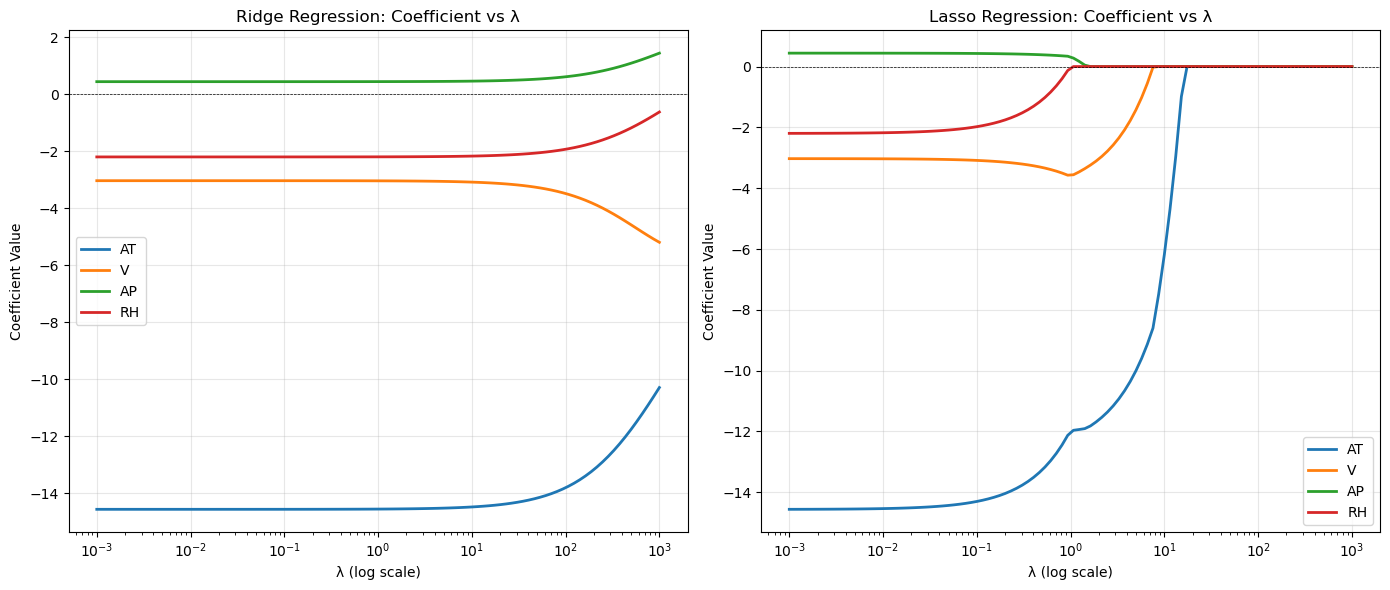

In [38]:
# Q5 Work

df_clean = pd.read_csv("usina.csv")

features = ['AT', 'V', 'AP', 'RH']
X = df_clean[features]
y = df_clean['PE']

# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 100 lambda values in log-space
lambdas = np.logspace(-3, 3, 100)

# Ridge path
ridge_coefs = []
for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_scaled, y)
    ridge_coefs.append(ridge.coef_)
ridge_coefs = np.array(ridge_coefs)

# Lasso path
lasso_coefs = []
for lam in lambdas:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_scaled, y)
    lasso_coefs.append(lasso.coef_)
lasso_coefs = np.array(lasso_coefs)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ridge plot
for i, feat in enumerate(features):
    axes[0].plot(lambdas, ridge_coefs[:, i], label=feat, linewidth=2)
axes[0].set_xscale('log')
axes[0].set_xlabel('λ (log scale)')
axes[0].set_ylabel('Coefficient Value')
axes[0].set_title('Ridge Regression: Coefficient vs λ')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Lasso plot
for i, feat in enumerate(features):
    axes[1].plot(lambdas, lasso_coefs[:, i], label=feat, linewidth=2)
axes[1].set_xscale('log')
axes[1].set_xlabel('λ (log scale)')
axes[1].set_ylabel('Coefficient Value')
axes[1].set_title('Lasso Regression: Coefficient vs λ')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Discussion for Q5
# 1) What happens to coefficients as λ increases in Ridge vs Lasso?
# In Ridge regression as λ increases all the coefficients shrink gradually and smoothly toward zero without becoming exactly zero.
# In Lasso regression as λ increases the coefficients also shrink toward zero, but some coefficients become exactly zero at certain 
# threshold values of λ creating the sparse models where some features are completely gotten rid of.

# 2) Which regression is better under multicollinearity in IVs, and why?
# Ridge regression is better for handling multicollinearity this is due to the fact that when features are highly correlated, OLS 
# produces unstable coefficients with high variance. Ridge adds an L2 penalty that distributes coefficient weight among correlated
# features rather than arbitrarily assigning it to one. Lasso tends to pick one feature from a correlated group and zero out the others.

# 3) Which regression is better for feature selection, and why?
# Lasso regression is better for feature selection because its L1 penalty drives some coefficients to be exactly zero. This provides
# automatic feature selection since features with zero coefficients can be removed from the model. The regularization path shows 
# which features get eliminated first and which would stay the longest. Ridge keeps all features with small but non-zero 
# coefficients, so there is no natural cutoff for removing features.